In [24]:
import numpy as np
import pygad
import matplotlib.pyplot as plt

# Fitness function for multi-objective optimization
def fitness_func(ga_instance, solution, solution_idx):
    a, b, c = solution
    
    #try with this function Z = ((X-500)**2 - 100000 * np.cos(2 * np.pi * X)) + ((Y-500)**2 - 100000 * np.cos(2 * np.pi * Y)) + 20
    fit1 = -((a-500)**2 - 100000 * np.cos(2 * np.pi * a)) - ((b-500)**2 - 100000 * np.cos(2 * np.pi * b)) + 20
    fit2 = -((a-500)**2 - 100000 * np.cos(2 * np.pi * a)) - ((b-500)**2 - 100000 * np.cos(2 * np.pi * b)) + 20

    return [fit1, fit2]

# Gene space --------------------------
a_MIN, a_MAX = 0, 1000
b_MIN, b_MAX = 0, 1000
c_MIN, c_MAX = 0, 1000

gene_space = [
    {'low': a_MIN, 'high': c_MAX},
    {'low': b_MIN, 'high': b_MAX},
    {'low': c_MIN, 'high': c_MAX}
]
# --------------------------

# GA Configuration
num_generations = 200
num_parents_mating = 12
sol_per_pop = 28
num_genes = len(gene_space)


# Create an instance of the GA class
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       fitness_func=fitness_func,
                       gene_space=gene_space,
                       parent_selection_type='nsga2',
                       crossover_type="single_point",
                       mutation_type="random",
                       parallel_processing=["thread", 28],
                       save_best_solutions=True)

#i want to understnd in each generation what are the solutions chosen for the reproduction and the cosen for the next generation
# Start the GA
ga_instance.run()

# Plot the Pareto Front
solutions = ga_instance.best_solutions
for solution in solutions:
    print(solution)
    print(fitness_func(ga_instance, solution, 0))

# Get the best solution
best_solution = ga_instance.best_solution()
print(best_solution)


/home/centos/anaconda3/envs/root_env/lib/python3.10/site-packages/pygad/pygad.py:728: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(
/home/centos/anaconda3/envs/root_env/lib/python3.10/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")
/home/centos/anaconda3/envs/root_env/lib/python3.10/site-packages/pygad/pygad.py:1153: UserWar

[520.82808552 463.00415316 814.22438532]
[145301.2475950358, 145301.2475950358]
[313.01986499 408.05075104 425.97128428]
[150784.60231721879, 150784.60231721879]
[313.01986499 408.05075104 425.97128428]
[150784.60231721879, 150784.60231721879]
[313.01986499 463.01940285 253.21372931]
[162170.72816666073, 162170.72816666073]
[313.01986499 463.01940285 253.21372931]
[162170.72816666073, 162170.72816666073]
[313.01986499 463.01940285 253.21372931]
[162170.72816666073, 162170.72816666073]
[313.01719635 463.01940285 425.35515083]
[162364.51424771815, 162364.51424771815]
[313.01719635 463.01940285 425.35515083]
[162364.51424771815, 162364.51424771815]
[313.01719635 463.01940285 425.35515083]
[162364.51424771815, 162364.51424771815]
[313.01719635 462.99261741 252.83314801]
[162997.17059904916, 162997.17059904916]
[313.01719635 462.99261741 252.83314801]
[162997.17059904916, 162997.17059904916]
[313.01719635 462.99261741 252.83314801]
[162997.17059904916, 162997.17059904916]
[313.01719635 462.

Parameters of the best solution: [320.99482638 468.00133031 248.63252472]
Fitness value of the best solution: [166896.90962376 166896.90962376]


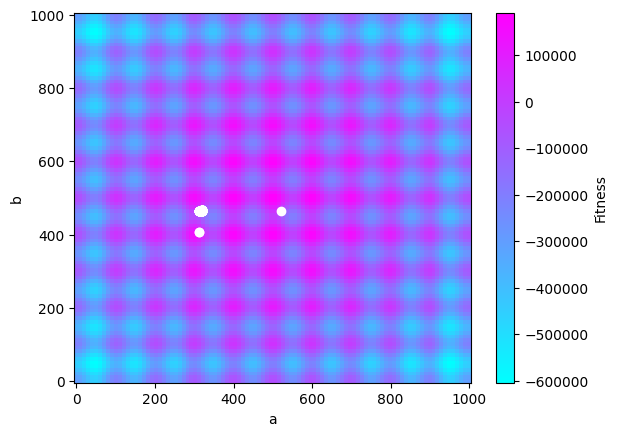

In [25]:
# Plot the fitness values with matplotlib
fig, ax = plt.subplots()

# Generate data for plotting
x = np.linspace(0, 1000, 100)
y = np.linspace(0, 1000, 100)
X, Y = np.meshgrid(x, y)
Z = np.array([fitness_func(ga_instance, [xi, yi, 0], 0)[0] for xi, yi in zip(np.ravel(X), np.ravel(Y))])
Z = Z.reshape(X.shape)

plt.pcolormesh(X, Y, Z, cmap='cool', shading='auto')
plt.xlabel('a')
plt.ylabel('b')
plt.colorbar(label='Fitness')

#show the best solutions in the plot
best_solutions = ga_instance.best_solutions
for solution in best_solutions:
    a, b, c = solution
    plt.plot(a, b, 'wo')


# Get the best solution
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(f"Parameters of the best solution: {solution}")
print(f"Fitness value of the best solution: {solution_fitness}")

plt.show()